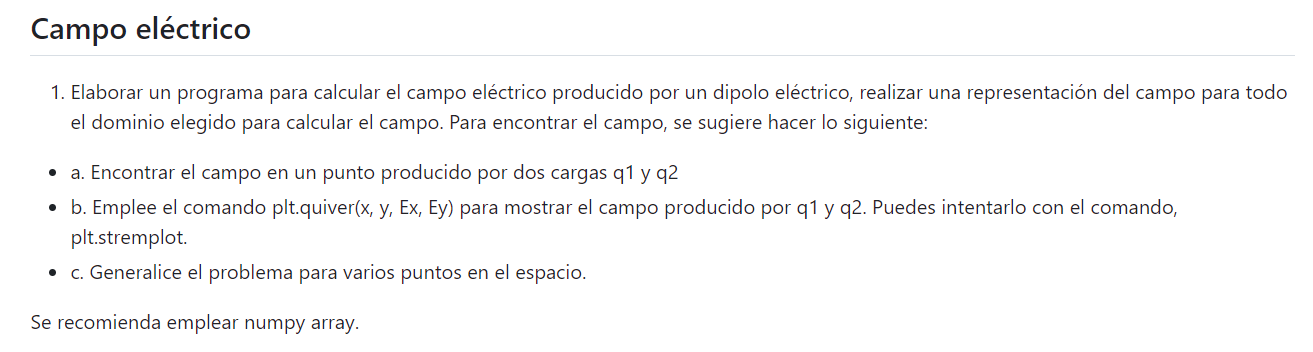

In [1]:
import numpy as np # NumPy (Numerical Python) es una biblioteca de programación en Python.
                   # Utilizada para realizar operaciones numéricas y matemáticas de manera eficiente y conveniente.

# Función que calcula el campo eléctrico producido por una sola carga.
def campo_electrico(carga, posicion, punto):

    # Calculamos el vector de posición desde la carga hasta el punto donde se calcula el campo.
    r = np.subtract(punto, posicion)  # Restamos las posiciones para obtener el vector de distancia.
    magnitud_r = np.linalg.norm(r)  # Calculamos la magnitud del vector de distancia.
    direccion_r = r / magnitud_r  # Calculamos el vector unitario en la dirección del vector de distancia.

    k = 8.9875e9  # ≈ Constante de Coulomb en N*m^2/C^2

    # Calculamos la magnitud del campo eléctrico y luego multiplicamos por el vector unitario para obtener el campo.
    magnitud_campo = k * carga / (magnitud_r ** 2)
    vector_campo = magnitud_campo * direccion_r
    return vector_campo

# Función que calcula el campo eléctrico producido por un dipolo.
def campo_dipolo(q1, pos1, q2, pos2, punto):

    # Calculamos el campo eléctrico de cada carga eléctrica por separado.
    campo_q1 = campo_electrico(q1, pos1, punto)
    campo_q2 = campo_electrico(q2, pos2, punto)

    # Sumamos los campos eléctricos debidos a cada carga para obtener el campo total.
    campo_total = np.add(campo_q1, campo_q2)

    return campo_total

# Propiedades del dipolo y el punto donde deseamos calcular el campo eléctrico.
q1 = 1e-6  # Carga q1 de 1 microcoulomb
pos1 = np.array([1, 0])  # Posición de q1 en (1, 0)

q2 = -1e-6  # Carga q2 de -1 microcoulomb
pos2 = np.array([-1, 0])  # Posición de q2 en (-1, 0)

punto = np.array([5, 4])  # Punto donde deseamos calcular el campo eléctrico.

# Calculamos el campo eléctrico total en el punto debido al dipolo.
campo_resultante = campo_dipolo(q1, pos1, q2, pos2, punto)

# Imprimimos el resultado.
print("Campo eléctrico en el punto (N/C):", campo_resultante)

# Calcular la magnitud del vector.
magnitud = np.linalg.norm(campo_resultante)

print("La magnitud del vector es (N/C):", magnitud)

Campo eléctrico en el punto (N/C): [ 54.78887592 102.72510682]
La magnitud del vector es (N/C): 116.42280058764324


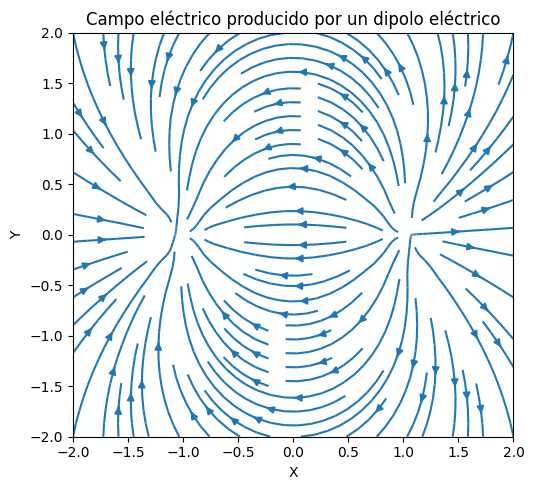

In [2]:
# Matplotlib es una biblioteca en Python ampliamente utilizada para la creación de visualizaciones y gráficos de alta calidad.
import matplotlib.pyplot as plt

# Generamos una cuadrícula de puntos en el espacio.
x = np.linspace(-2, 2, 20)  # Crear un conjunto de puntos en el eje x.
y = np.linspace(-2, 2, 20)  # Crear un conjunto de puntos en el eje y.
X, Y = np.meshgrid(x, y)  # Crear una matriz de coordenadas X, Y.

# Inicializamos matrices para almacenar los componentes x e y del campo eléctrico en cada punto.
Ex = np.zeros_like(X)  # Matriz para el componente x del campo eléctrico.
Ey = np.zeros_like(Y)  # Matriz para el componente y del campo eléctrico.

# Calculamos el campo eléctrico en cada punto de la cuadrícula.
for i in range(len(x)):
    for j in range(len(y)):
        punto = np.array([x[i], y[j]])  # Punto actual en la cuadrícula.
        campo = campo_dipolo(q1, pos1, q2, pos2, punto)  # Calcular el campo eléctrico en el punto.
        Ex[j, i] = campo[0]  # Almacenar el componente x del campo eléctrico.
        Ey[j, i] = campo[1]  # Almacenar el componente y del campo eléctrico.

# Graficamos los campos eléctricos utilizando streamplot (líneas de corriente).
plt.figure(figsize=(10, 5)) # Tamaño del gráfico.

# Gráfico con líneas de corriente (streamplot) para representar los campos eléctricos.
plt.subplot(1, 2, 2)
plt.streamplot(X, Y, Ex, Ey)  # Crear un gráfico de líneas de corriente usando las matrices Ex y Ey.
plt.xlabel('X') # Etiqueta eje x.
plt.ylabel('Y') # Etiqueta eje y.
plt.title('Campo eléctrico producido por un dipolo eléctrico') # Título.

plt.tight_layout() # Ajustar automáticamente los márgenes y espacios entre los elementos.
plt.show()  # Mostrar el gráfico.
